# 필요 모듈 임포트

In [ ]:
import pandas as pd
from sklearn import metrics
from sklearn import datasets
from google.colab import drive
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# 구글드라이브 연결

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/기계학습 팀플/전처리 데이터/preprocess_real_final.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 불러와서 Split하기

In [ ]:
df = pd.read_csv(path, encoding =  'cp949')

df = df.drop(['Unnamed: 0'], axis = 1)

X = df.iloc[:,(df.columns != 'price')]
y = df.price

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 개수 확인'''

(35708, 40) (15304, 40) (35708,) (15304,)


# 최적 하이퍼 파라미터 찾기, 학습

In [ ]:
# 하이퍼 파라미터 서치 범위
params = {
    'n_estimators': [10, 100],
    'max_depth': [6, 8, 10, 12],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}

# RandomForestRegressor 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestRegressor(random_state=0, n_jobs=-1)
rf_clf_2 = RandomForestRegressor(random_state=0, n_jobs=-1)

rf_clf.fit(train_x, train_y)
grid_cv = GridSearchCV(rf_clf_2, param_grid=params, cv=3, n_jobs=-1)

print('랜덤포레스트 최적 하이퍼 파라미터:', grid_cv.best_params_)

# 일반 랜덤포레스트 테스트

In [ ]:
pred_y = rf_clf.predict(test_x)

print("랜덤포레스트")
print("테스트 세트 예측 : {}".format(rf_clf.predict(test_x)))
print("테스트 세트의 R^2 : {:.5f}".format(rf_clf.score(test_x, test_y)))
print(f'MSE : {mean_squared_error(test_y, pred_y) : .4f}')

랜덤포레스트
테스트 세트 예측 : [14482.39 13118.58 14019.21 ... 17872.36  8349.87 19171.7 ]
테스트 세트의 R^2 : 0.86199
MSE :  1756581.6144


# Grid_cv 랜덤 포레스트 테스트

In [ ]:
pred_y = grid_cv.predict(test_x)

print("랜덤포레스트")
print("테스트 세트 예측 : {}".format(grid_cv.predict(test_x)))
print("테스트 세트의 R^2 : {:.4f}".format(grid_cv.score(test_x, test_y)))
print(f'MSE : {mean_squared_error(test_y, pred_y) : .4f}')

In [ ]:
print('최적 하이퍼 파라미터: ', grid_cv.best_params_)

In [ ]:
final_result = pd.concat([test_y.reset_index(drop=True), pd.DataFrame(grid_cv.predict(test_x))], axis = 1)

In [ ]:
final_result.columns = ['label','predict']

In [ ]:
from sklearn.metrics import accuracy_score
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestRegressor(n_estimators = 100,
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8)
rf_clf1.fit(train_x, train_y)
pred = rf_clf1.predict(test_x)
print('예측 정확도: {:.4f}'.format(rf_clf1.score(test_x,test_y)))

예측 정확도: 0.8563


In [ ]:
test_y

19893    16754.0
36271     9955.0
43781    13497.0
27999    13000.0
21025    16995.0
          ...   
27505    16482.0
37181    14987.0
26459    17586.0
22960     7995.0
36988    18219.0
Name: price, Length: 15304, dtype: float64

# 결과 시각화

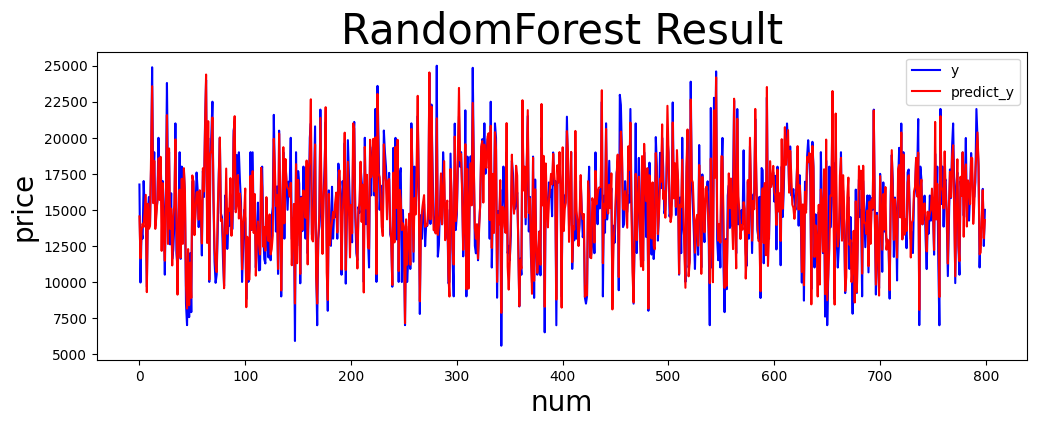

In [ ]:
import matplotlib.pyplot as plt

pre = pd.DataFrame(pred)
test_y = test_y.reset_index()
result = pd.concat([test_y, pre], axis = 1)
result.columns = ['a', 'real', 'predict']

fig = plt.figure(figsize = (12,4))
chart = fig.add_subplot(1,1,1)
chart.plot(result.real[:800],  color = 'blue', label = 'y')
chart.plot(result.predict[:800],  color = 'red', label = 'predict_y')
chart.set_title('RandomForest Result', size=30)
plt.xlabel('num', size = 20)
plt.ylabel('price', size = 20)
plt.legend(loc = 'best')